# Bagging and Random Forest

In [1]:
import numpy as np
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


First let's download dataset digits

In [2]:
# Download dataset "digits"
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
print digits.DESCR

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [6]:
print "target names: {names}".format(names = digits.target_names)

target names: [0 1 2 3 4 5 6 7 8 9]


In [7]:
type(digits.data)

numpy.ndarray

In [8]:
# Extract feature matrix and target vector from the dataset 
X_data = digits.data
y = digits.target

y.shape

(1797,)

### Task 1

In [20]:
from sklearn import tree 
from sklearn.model_selection import cross_val_score

In [21]:
tree_model = tree.DecisionTreeClassifier()
cv_results_1 = cross_val_score(tree_model, X_data, y, cv=10)
print cv_results_1
print cv_results_1.mean()

[0.8        0.85245902 0.83977901 0.79444444 0.7877095  0.88268156
 0.88268156 0.81460674 0.85310734 0.8125    ]
0.8319969178266874


In [22]:
def write_answer_1(scores):
    with open("answer1.txt", "w") as fout:
        fout.write(str(scores.mean()))

In [23]:
write_answer_1(cv_results_1)

### Task 2

In [24]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=tree_model, n_estimators=100)
cv_results_2 = cross_val_score(bagging, X_data, y, cv=10)

In [31]:
print cv_results_2.mean()

0.9216280317191481


In [25]:
def write_answer_2(scores):
    with open("answer2.txt", "w") as fout:
        fout.write(str(scores.mean()))

In [26]:
write_answer_2(cv_results_2)

### Task 3

In [27]:
# Choose randomly the features for making the decision once for the training
random_bagging = BaggingClassifier(base_estimator=tree_model, n_estimators=100, max_features = 8)
cv_results_3 = cross_val_score(random_bagging, X_data, y, cv=10)

In [30]:
print cv_results_3.mean()

0.9249965526032143


In [28]:
def write_answer_3(scores):
    with open("answer3.txt", "w") as fout:
        fout.write(str(scores.mean()))

In [29]:
write_answer_3(cv_results_3)

### Task 4

In [32]:
# Now choose randomly the features each time we make decisions in every leaf
tree_model = tree.DecisionTreeClassifier(max_features = 8)
random_bagging = BaggingClassifier(base_estimator=tree_model, n_estimators=100)
cv_results_4 = cross_val_score(random_bagging, X_data, y, cv=10)

In [33]:
print cv_results_4.mean()

0.9522334856498358


In [34]:
def write_answer_4(scores):
    with open("answer4.txt", "w") as fout:
        fout.write(str(scores.mean()))

In [35]:
write_answer_4(cv_results_4)

### Task 5

In [39]:
#In fact in previous task we did Random forest algorithm
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
cv_results_5 = cross_val_score(random_forest, X_data, y, cv=10)
print cv_results_5.mean()

0.9545393211588948


In [40]:
import matplotlib.pyplot as plt

In [45]:
# How does the cv_score depend from the number of trees?
n_trees = np.arange(5, 150, 5)
scores = []
for n in n_trees:
    random_forest = RandomForestClassifier(n_estimators=n)
    scores.append(cross_val_score(random_forest, X_data, y, cv=10).mean())

Text(0,0.5,'CV mean score')

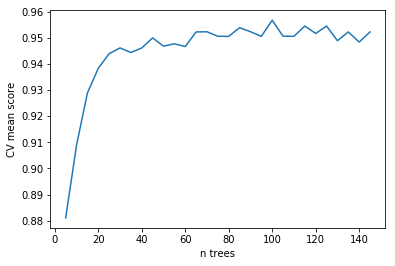

In [44]:
plt.plot(n_trees, np.array(scores))
plt.xlabel("n trees")
plt.ylabel("CV mean score")

In [47]:
# What about the number of features?
n_features = np.arange(1, 64, 8)
scores = []
for m in n_features:
    random_forest = RandomForestClassifier(max_features = m)
    scores.append(cross_val_score(random_forest, X_data, y, cv=10).mean())

Text(0,0.5,'CV mean score')

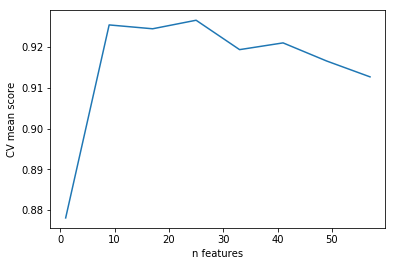

In [48]:
plt.plot(n_features, np.array(scores))
plt.xlabel("n features")
plt.ylabel("CV mean score")

In [49]:
# Finally let's examine the dependency from the depth of the trees
depth = np.arange(1, 100, 10)
scores = []
for d in depth:
    random_forest = RandomForestClassifier(max_depth = d)
    scores.append(cross_val_score(random_forest, X_data, y, cv=10).mean())

Text(0,0.5,'CV mean score')

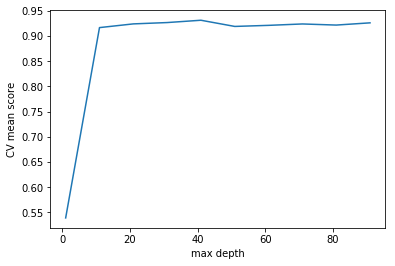

In [50]:
plt.plot(depth, np.array(scores))
plt.xlabel("max depth")
plt.ylabel("CV mean score")

In [51]:
points = [2, 3, 4, 7]

In [58]:
def write_answer_5(points):
    with open("answer5.txt", "w") as fout:
        for point in points:
            fout.write(str(point) + " ")

In [59]:
write_answer_5(points)